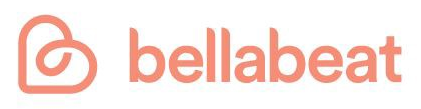

* [1. About](#About)
* [2. Ask](#Ask)
* [3. Prepare](#Prepare)
* [4. Process](#Process)
* [5. Analize](#Analize)
* [6. Share](#Share)
* [7. Act](#Act)


    


<a id="About"></a>
# <span style="color:#20beff;"> 1. About </span>

Bellabeat is a technology company that focuses on creating innovative and stylish health and wellness products for women. The company was founded in 2013 by Urska Srsen and Sandro Mur, with the goal of empowering women to take control of their health and well-being through technology.

We will focus on one of Bellabeat’s products: Bellabeat app. It provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits.

The main goal is analyze smart devices fitness data, discover trendings and determine how it could help unlock new growth opportunities for Bellabeat


<a id="Ask"></a>
# <span style="color:#20beff;"> 2. Ask </span>

**Business Task**

Analyze smart device usage data to gain insight into how consumers use non-Bellabeat smart devices and apply it to Bellabeat's marketing strategy.

**Stakeholders**

Urška Sršen - Bellabeat cofounder and Chief Creative Officer

Sando Mur - Bellabeat cofounder and key member of Bellabeat executive team

Bellabeat Marketing Analytics team

<a id="Prepare"></a>
# <span style="color:#20beff;"> 3. Prepare </span>

**Dataset used**

The data source used is FitBit Fitness Tracker Data. This dataset is stored in Kaggle and was made available through Mobius.

**Accessibility and privacy of data**

Verifying the metadata of our dataset we can confirm it is open-source. The owner has dedicated the work to the public domain by waiving all of his or her rights to the work worldwide under copyright law, including all related and neighboring rights, to the extent allowed by law.

**Information about our dataset**

These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.

**Loading Packages in R for Data Organization and Verification**

Available to us are 18 CSV documents. Each document represents different quantitative data tracked by Fitbit. 


In [11]:
library(tidyverse)
library(dplyr)
library(tidyr)
library(lubridate)
library(here)
library(skimr)
library(janitor)
library(ggplot2)
library(ggrepel)

here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




**Importing the data**

In [12]:
#We will use these five datasets:

activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

calories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")

intensities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")

sleep <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

weight <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

In [13]:
glimpse(activity)

#Checking Columns and data types

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

In [14]:
glimpse(calories)

#Note that the ActivityHour is in wrong format "chr"

Rows: 22,099
Columns: 3
$ Id           <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityHour <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/12/20…
$ Calories     <int> 81, 61, 59, 47, 48, 48, 48, 47, 68, 141, 99, 76, 73, 66, …


In [15]:
glimpse(intensities)
#Note that the ActivityHour is in wrong format "chr"

Rows: 22,099
Columns: 4
$ Id               <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 15039…
$ ActivityHour     <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/1…
$ TotalIntensity   <int> 20, 8, 7, 0, 0, 0, 0, 0, 13, 30, 29, 12, 11, 6, 36, 5…
$ AverageIntensity <dbl> 0.333333, 0.133333, 0.116667, 0.000000, 0.000000, 0.0…


In [16]:
glimpse(sleep)
#Note that the SleepDay is in wrong format "chr"

Rows: 413
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ SleepDay           <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM", "…
$ TotalSleepRecords  <int> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <int> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <int> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…


In [17]:
glimpse(weight)

#Note that Date is in wrong format "chr"

Rows: 67
Columns: 8
$ Id             <dbl> 1503960366, 1503960366, 1927972279, 2873212765, 2873212…
$ Date           <chr> "5/2/2016 11:59:59 PM", "5/3/2016 11:59:59 PM", "4/13/2…
$ WeightKg       <dbl> 52.6, 52.6, 133.5, 56.7, 57.3, 72.4, 72.3, 69.7, 70.3, …
$ WeightPounds   <dbl> 115.9631, 115.9631, 294.3171, 125.0021, 126.3249, 159.6…
$ Fat            <int> 22, NA, NA, NA, NA, 25, NA, NA, NA, NA, NA, NA, NA, NA,…
$ BMI            <dbl> 22.65, 22.65, 47.54, 21.45, 21.69, 27.45, 27.38, 27.25,…
$ IsManualReport <chr> "True", "True", "False", "True", "True", "True", "True"…
$ LogId          <dbl> 1.462234e+12, 1.462320e+12, 1.460510e+12, 1.461283e+12,…


**Data Organization**

* The data is considered long since each row is one time point per subject, so each subject will have data in multiple rows 

* Every user has a unique ID and different rows since data is tracked by day and time

* We could verify this checking the small quantity of columns for each table

<a id="Process"></a>
# <span style="color:#20beff;"> 4. Process </span>

The whole analysis will be executed in R due to the size of the data, and the ability to create quick and beautiful visualizations for stakeholders

**Packages used in this report are:** 


* tidyverse

* here

* skimr

* janitor

* lubridate

* ggplot2

* ggrepel

**Converting format from Strings to Dates and DateTime**

In [18]:
# intensities
intensities$ActivityHour=as.POSIXct(intensities$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
intensities$time <- format(intensities$ActivityHour, format = "%H:%M:%S")
intensities$date <- format(intensities$ActivityHour, format = "%m/%d/%y")
# calories
calories$ActivityHour=as.POSIXct(calories$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
calories$time <- format(calories$ActivityHour, format = "%H:%M:%S")
calories$date <- format(calories$ActivityHour, format = "%m/%d/%y")
# activity
activity$ActivityDate=as.POSIXct(activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
activity$date <- format(activity$ActivityDate, format = "%m/%d/%y")
# sleep
sleep$SleepDay=as.POSIXct(sleep$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep$date <- format(sleep$SleepDay, format = "%m/%d/%y")


**Checking corrections**

In [19]:
head(intensities)
head(calories)
head(activity)
head(sleep)

,Id,ActivityHour,TotalIntensity,AverageIntensity,time,date
,<dbl>,<dttm>,<int>,<dbl>,<chr>,<chr>
1,1503960366,2016-04-12 00:00:00,20,0.333333,00:00:00,04/12/16
2,1503960366,2016-04-12 01:00:00,8,0.133333,01:00:00,04/12/16
3,1503960366,2016-04-12 02:00:00,7,0.116667,02:00:00,04/12/16
4,1503960366,2016-04-12 03:00:00,0,0.000000,03:00:00,04/12/16
5,1503960366,2016-04-12 04:00:00,0,0.000000,04:00:00,04/12/16
6,1503960366,2016-04-12 05:00:00,0,0.000000,05:00:00,04/12/16


,Id,ActivityHour,Calories,time,date
,<dbl>,<dttm>,<int>,<chr>,<chr>
1,1503960366,2016-04-12 00:00:00,81,00:00:00,04/12/16
2,1503960366,2016-04-12 01:00:00,61,01:00:00,04/12/16
3,1503960366,2016-04-12 02:00:00,59,02:00:00,04/12/16
4,1503960366,2016-04-12 03:00:00,47,03:00:00,04/12/16
5,1503960366,2016-04-12 04:00:00,48,04:00:00,04/12/16
6,1503960366,2016-04-12 05:00:00,48,05:00:00,04/12/16


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,04/12/16
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,04/13/16
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,04/14/16
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,04/15/16
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,04/16/16
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,04/17/16


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date
,<dbl>,<dttm>,<int>,<int>,<int>,<chr>
1,1503960366,2016-04-12,1,327,346,04/12/16
2,1503960366,2016-04-13,2,384,407,04/13/16
3,1503960366,2016-04-15,1,412,442,04/15/16
4,1503960366,2016-04-16,2,340,367,04/16/16
5,1503960366,2016-04-17,1,700,712,04/17/16
6,1503960366,2016-04-19,1,304,320,04/19/16


<a id="Analize"></a>
# <span style="color:#20beff;"> 5. Analize </span>

We will count unique values for the column Id in each table

In [20]:
n_distinct(activity$Id)
n_distinct(calories$Id)
n_distinct(intensities$Id)
n_distinct(sleep$Id)
n_distinct(weight$Id)

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

Through this way we could observe that the tables that tracks activity, calories and intensities; have 33 unique participants each one

The sleep tracking table have 24 participants and the weight table only 8

Now, lets summarize each data set and see some insights:

In [21]:
# activity
print("Activity Table")
activity %>%  
  select(TotalSteps,
         TotalDistance,
         SedentaryMinutes, Calories) %>%
  summary()

# explore num of active minutes per category
print("Activity Table - Number of active minutes per category")
activity %>%
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
  summary()

# calories
print("Calories Table")
calories %>%
  select(Calories) %>%
  summary()

# sleep
print("Sleep Table")
sleep %>%
  select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>%
  summary()
# weight

print("Weight Table")
weight %>%
  select(WeightKg, BMI) %>%
  summary()

[1] "Activity Table"


   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

[1] "Activity Table - Number of active minutes per category"


 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       

[1] "Calories Table"


    Calories     
 Min.   : 42.00  
 1st Qu.: 63.00  
 Median : 83.00  
 Mean   : 97.39  
 3rd Qu.:108.00  
 Max.   :948.00  

[1] "Sleep Table"


 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

[1] "Weight Table"


    WeightKg           BMI       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  

Some insights encountered in the summary:

* Average sedentary time is 991 minutes or 16 hours

* On the average, participants sleep 1 time for 7 hours.

* Average total steps per day are 7638 which a little bit less for having health benefits for according to the CDC research (8000 steps)

In [22]:
merged_data <- merge(sleep, activity, by=c('Id', 'date'))
head(merged_data)

,Id,date,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<dttm>,<int>,<int>,<int>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,04/12/16,2016-04-12,1,327,346,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,04/13/16,2016-04-13,2,384,407,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,04/15/16,2016-04-15,1,412,442,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
4,1503960366,04/16/16,2016-04-16,2,340,367,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
5,1503960366,04/17/16,2016-04-17,1,700,712,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
6,1503960366,04/19/16,2016-04-19,1,304,320,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035


In [23]:
merged_sleep <- merge(sleep, activity, by=c('Id', 'date'))
head(merged_sleep)

,Id,date,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<dttm>,<int>,<int>,<int>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,04/12/16,2016-04-12,1,327,346,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,04/13/16,2016-04-13,2,384,407,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,04/15/16,2016-04-15,1,412,442,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
4,1503960366,04/16/16,2016-04-16,2,340,367,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
5,1503960366,04/17/16,2016-04-17,1,700,712,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
6,1503960366,04/19/16,2016-04-19,1,304,320,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035


<a id="Share"></a>
# <span style="color:#20beff;"> 6. Share </span>

I omitted one weird point that indicated that more than 30000 steps burns less calories

Certainly, there is a strong correlation between the number of steps taken and the amount of calories burned. Physical activity, such as walking or running, requires energy expenditure, which leads to calorie burn. The more steps you take, the more energy you are expending, resulting in a higher calorie burn

`geom_smooth()` using formula = 'y ~ x'


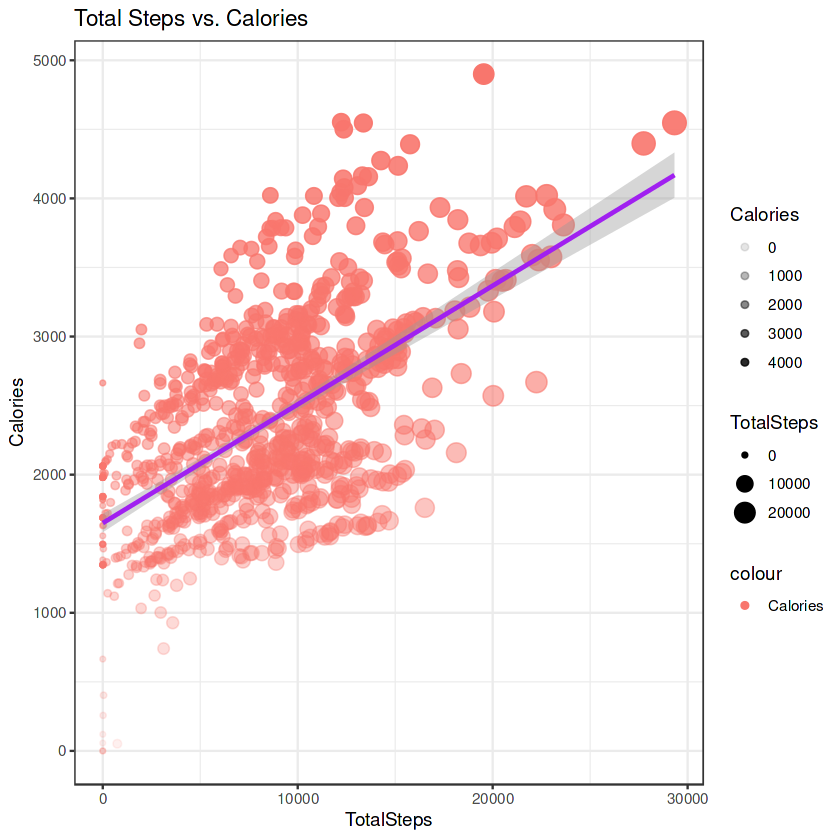

In [24]:
activity_cleaned <- activity %>% filter(TotalSteps <= 30000)

ggplot(data = activity_cleaned) + 
  geom_point(mapping = aes(x=TotalSteps, y=Calories, alpha = Calories, color = "Calories", size = TotalSteps)) + geom_smooth(mapping = aes(x=TotalSteps, y=Calories),method =lm, color = "purple") + labs(title="Total Steps vs. Calories") + theme_bw()

Here we can observe the intervals (hours) with the highest intensity in physical activity. They are between 5:00 p.m and 7:00 p.m

Warning message in geom_histogram(stat = "identity", fill = "light blue", color = "red"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


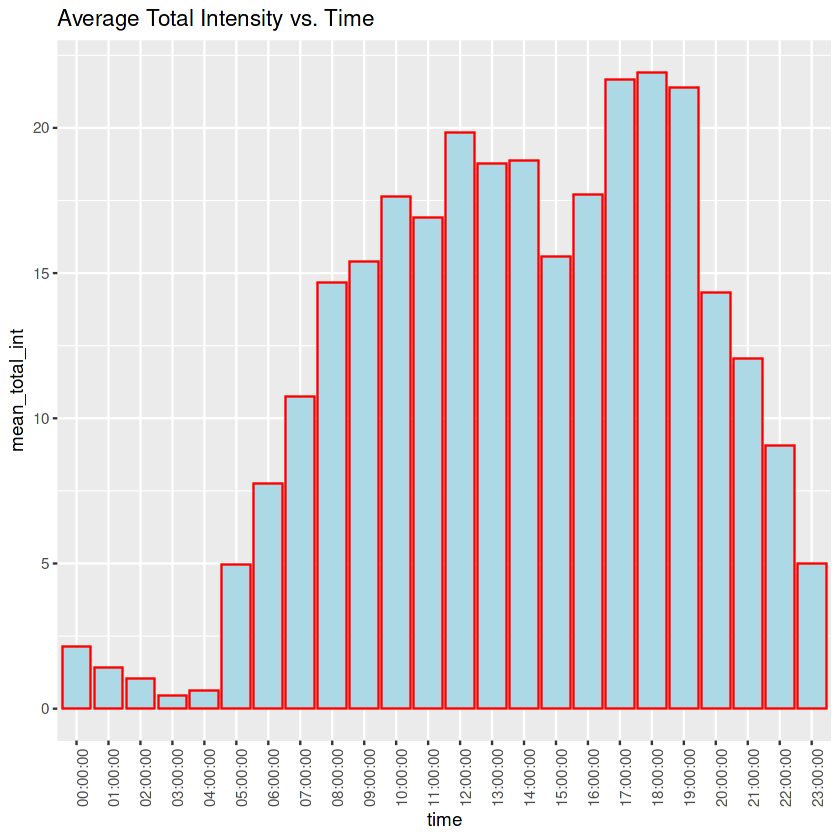

In [25]:
int_new <- intensities %>%
  group_by(time) %>%
  drop_na() %>%
  summarise(mean_total_int = mean(TotalIntensity))

ggplot(data=int_new, aes(x=time, y=mean_total_int)) + geom_histogram(stat = "identity", fill='light blue', color = 'red') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Average Total Intensity vs. Time")

An additional confirmation would be that the less time we spend in bed, the more calories we burn, and this is evident in the following graph:

`geom_smooth()` using formula = 'y ~ x'


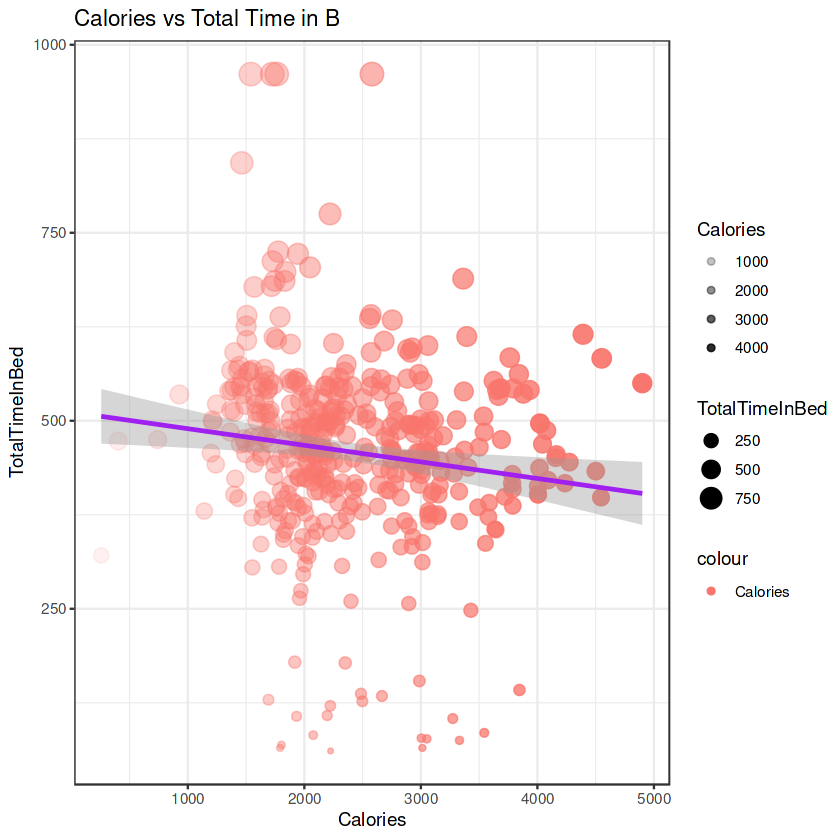

In [26]:
ggplot(data = merged_sleep) + 
  geom_point(mapping = aes(x=Calories, y=TotalTimeInBed, alpha = Calories, color = "Calories", size = TotalTimeInBed)) + geom_smooth(mapping = aes(x=Calories, y=TotalTimeInBed), method = lm, color= "purple")+ labs(title= "Calories vs Total Time in B") + theme_bw()

<a id="Act"></a>
# <span style="color:#20beff;"> 7. Act </span>

Upon analyzing the Bella Beat data and conducting various visualizations and analyses, valuable improvement opportunities and recommended actions have been identified.

First and foremost, it is crucial to prioritize the enhancement of the mobile application's usability in order to increase user retention and promote higher engagement levels. This can be achieved by simplifying the interface, optimizing navigation, and introducing compelling additional features.

Moreover, an improved marketing strategy is essential to raise awareness and encourage product adoption. This may entail targeted advertising campaigns, collaborations with influencers, and an expanded social media presence.

Additionally, the establishment of a robust monetization strategy is vital for long-term business sustainability. This may involve implementing a premium subscription model with exclusive features and exploring strategic partnerships with wellness service providers.

Overall, by acting upon these recommendations, Bella Beat can fortify its market position and deliver enhanced value to its users, while ensuring sustained growth and success within the wellness and wearable technology industry.